# Ajuste por mínimos cuadrados

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caramirezs/MetNum_202210/blob/main/2_Ajuste_de_curvas/2.4_Ajustes_por_minimos_cuadrados.ipynb)

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Polinomios (hasta grado 3)

In [50]:
def mincua_lineal(datos_x, datos_y):

    # numero de datos
    n = len(datos_x)

    # convertir la lista en arreglos
    x = np.array(datos_x)
    y = np.array(datos_y)

    # matriz de coeficientes
    mat_A = np.array([[sum(x**2), sum(x)],
                      [sum(x), n]])
    vec_b = np.array([[sum(y*x)],
                      [sum(y)]])
    # a_1, a_0
    sol = np.dot(np.linalg.inv(mat_A),vec_b)
    return sol[0][0], sol[1][0]


def mincua_cuadratica(datos_x, datos_y):

    # numero de datos
    n = len(datos_x)

    # convertir la lista en arreglos
    x = np.array(datos_x)
    y = np.array(datos_y)

    # matriz de coeficientes
    mat_A = np.array([[sum(x**4), sum(x**3), sum(x**2)],
                      [sum(x**3), sum(x**2), sum(x)],
                      [sum(x**2), sum(x), n]])
    vec_b = np.array([[sum(y*x**2)],
                      [sum(y*x)],
                      [sum(y)]])

    sol = np.dot(np.linalg.inv(mat_A),vec_b)
    return sol[0][0], sol[1][0], sol[2][0]

def mincua_cubica(datos_x, datos_y):

    # numero de datos
    n = len(datos_x)

    # convertir la lista en arreglos
    x = np.array(datos_x)
    y = np.array(datos_y)

    # matriz de coeficientes
    mat_A = np.array([[sum(x**6), sum(x**5), sum(x**4), sum(x**3)],
                      [sum(x**5), sum(x**4), sum(x**3), sum(x**2)],
                      [sum(x**4), sum(x**3), sum(x**2), sum(x)],
                      [sum(x**3), sum(x**2), sum(x), n]])
    vec_b = np.array([[sum(y*x**3)],
                      [sum(y*x**2)],
                      [sum(y*x)],
                      [sum(y)]])

    sol = np.dot(np.linalg.inv(mat_A),vec_b)
    return sol[0][0], sol[1][0], sol[2][0], sol[3][0]


def coef_det(datos_x, datos_y, f):
    s_t = sum((np.array(datos_y) - np.mean(datos_y))**2)
    s_r = sum((np.array(datos_y) - f(np.array(datos_x)))**2)
    return (s_t - s_r)/s_t

In [80]:
datos_x = [1, 2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 9, 10, 10, 11, 12, 12, 13, 14, 14]
datos_y = [4.8, 8.8, 8, 7.9, 11.9, 14.4, 14.1, 15.8, 15.6, 17.8, 18.2, 17.1, 18.8, 19.5, 18.9, 21.7, 21.9, 23.8, 26.9, 25.1]
a_1, a_0 = mincua_lineal(datos_x, datos_y)
print(f'La ecuación de la recta es:\n'
      f'{a_1:.2f}*x + {a_0:.2f}')

La ecuación de la recta es:
1.42*x + 5.30


In [82]:
f = lambda x: a_1*x + a_0
s_t = sum((np.array(datos_y) - np.mean(datos_y))**2)
s_r = sum((np.array(datos_y) - f(np.array(datos_x)))**2)
(s_t - s_r)/s_t

0.9620301131407123

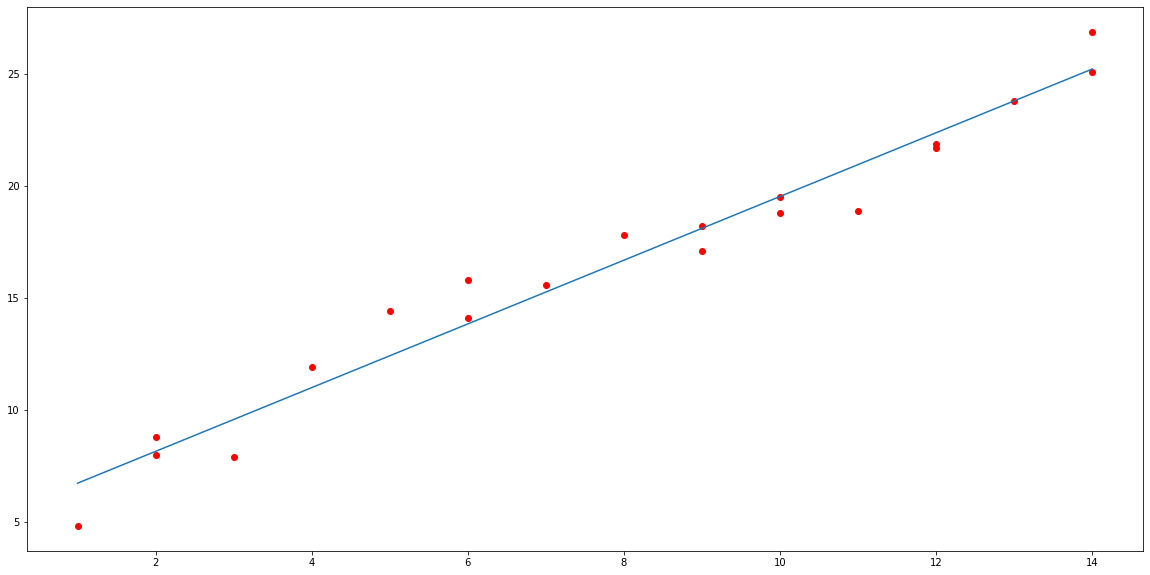

In [36]:
f = lambda x: a_1*x + a_0
x = np.linspace(min(datos_x),max(datos_x))
plt.figure(figsize=(20,10))
plt.plot(datos_x, datos_y, 'ro')
plt.plot(x, f(x), '-')

In [83]:
datos_x = [1, 2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 9, 10, 10, 11, 12, 12, 13, 14, 14]
datos_y = [4.8, 8.8, 8, 7.9, 11.9, 14.4, 14.1, 15.8, 15.6, 17.8, 18.2, 17.1, 18.8, 19.5, 18.9, 21.7, 21.9, 23.8, 26.9, 25.1]
a_2, a_1, a_0 = mincua_cuadratica(datos_x, datos_y)
print(f'La ecuación de la cuadrática es:\n'
      f'{a_2:.2f}*x^2 + {a_1:.2f}*x + {a_0:.2f}')

La ecuación de la cuadrática es:
-0.01*x^2 + 1.65*x + 4.68


In [84]:
f = lambda x: a_2*x**2 + a_1*x + a_0
s_t = sum((np.array(datos_y) - np.mean(datos_y))**2)
s_r = sum((np.array(datos_y) - f(np.array(datos_x)))**2)
(s_t - s_r)/s_t

0.9633818836372199

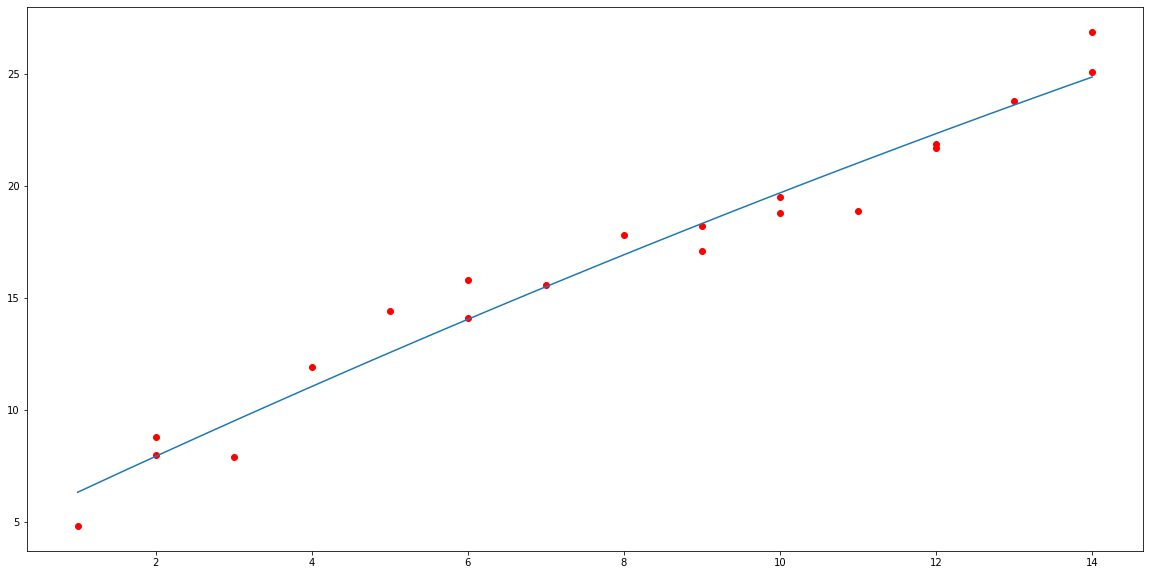

In [41]:
f = lambda x: a_2*x**2 + a_1*x + a_0
x = np.linspace(min(datos_x),max(datos_x))
plt.figure(figsize=(20,10))
plt.plot(datos_x, datos_y, 'ro')
plt.plot(x, f(x), '-')

In [5]:
datos_x = [1, 2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 9, 10, 10, 11, 12, 12, 13, 14, 14]
datos_y = [4.8, 8.8, 8, 7.9, 11.9, 14.4, 14.1, 15.8, 15.6, 17.8, 18.2, 17.1, 18.8, 19.5, 18.9, 21.7, 21.9, 23.8, 26.9, 25.1]
a_3, a_2, a_1, a_0 = mincua_cubica(datos_x, datos_y)
print(f'La ecuación de la cúbica es:\n'
      f'{a_3:.3f}*x^3 + {a_2:.3f}*x^2 + {a_1:.3f}*x + {a_0:.3f}')

La ecuación de la cúbica es:
0.015*x^3 + -0.372*x^2 + 3.946*x + 1.211


In [6]:
f = lambda x: a_3*x**3 + a_2*x**2 + a_1*x + a_0
s_t = sum((np.array(datos_y) - np.mean(datos_y))**2)
s_r = sum((np.array(datos_y) - f(np.array(datos_x)))**2)
(s_t - s_r)/s_t

0.9803454953413482

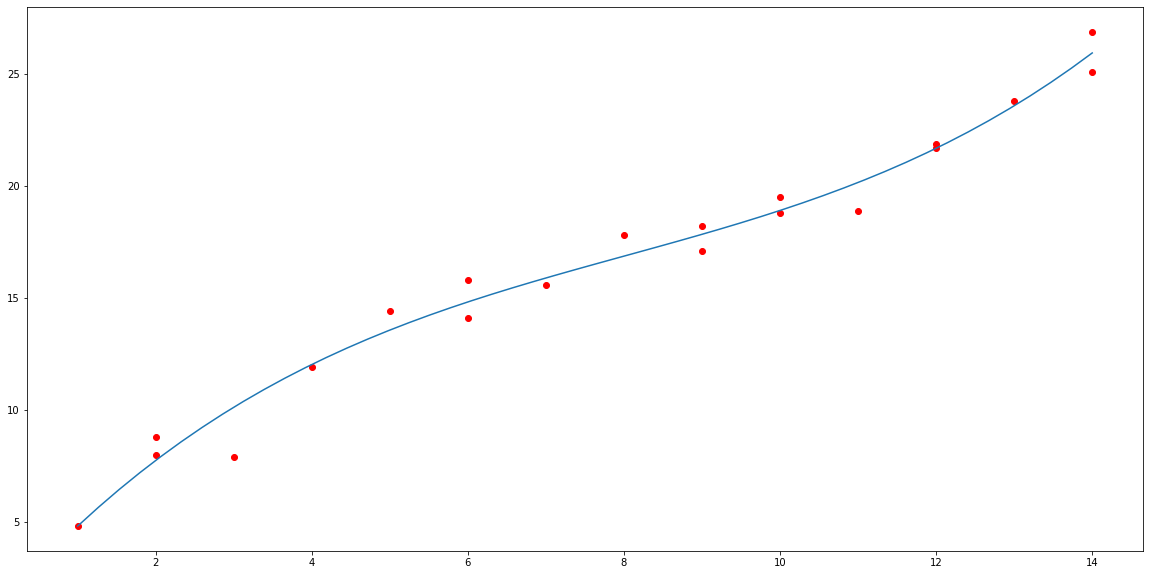

In [7]:
f = lambda x: a_3*x**3 + a_2*x**2 + a_1*x + a_0
x = np.linspace(min(datos_x),max(datos_x))
plt.figure(figsize=(20,10))
plt.plot(datos_x, datos_y, 'ro')
plt.plot(x, f(x), '-')

# Método mínimo cuadrados para polinomios de manera general

In [8]:
# Autores JOHN FREDY CASALLAS y JORGE ENRIQUE HERNANDEZ
def mincua_n(datos_x, datos_y, grado):
    import numpy as np
    # numero de datos
    n = len(datos_x)

    # convertir la lista en arreglos
    x = np.array(datos_x)
    y = np.array(datos_y)

    # matriz de coeficientes inicial (reserva de espacios) según grado 2x2, 3x3, nxn
    mat_z = np.zeros(shape=(grado,grado), dtype = float)
    #print(f'mat_z: {tabulate(mat_z)}')

    #mat_z[0][0] = n

    # Ciclo de prueba para establecer orden de asignación en matriz nxn
    idx = 0
    idx_reset = 0
    for j in range(0,grado):
        for k in range(0,grado):
            mat_z[k][j] = idx
            idx +=1
        idx = idx_reset + 1
        idx_reset += 1

    #print(f'mat_z: {tabulate(mat_z)}')

    # Ciclo para asignación de sum(x**n) en el orden establecido
    idx = 0
    idx_reset = 0
    for j in range(0,grado):
        for k in range(0,grado):
            mat_z[k][j] = sum(x**idx)
            idx +=1
        idx = idx_reset + 1
        idx_reset += 1

    #print(f'mat_z: {tabulate(mat_z)}')

    # Cambio de orden de valores en índices para ser compatible con función "linalg"
    mat_A = np.flip(mat_z)

    #print(f'mat_A: {tabulate(mat_A)}')


    # vector zeros (reserva de espacios)
    vec_b = np.zeros(shape=(grado), dtype = float)

    # asignación de términos independientes a vector según índice
    for j in range(grado, 0,-1):
        vec_b[j-1] = sum(y*(x**(j-1)))

    # Aplicación tipo 'reverse' para realizar producto punto con "linalg"
    vec_b = vec_b[::-1]

    #print(f'igualdad: {vec_b}')

    # Ejecución de producto punto contra matriz inversa para encontrar los coeficientes
    sol = np.dot(np.linalg.inv(mat_A),vec_b)

    #print(sol)

    # Declaración de lista para alojar los coeficientes resultantes como un retorno de la función
    li = []
    for x in range(0,len(sol)):
        li.append(sol[x])

    # Retorna la lista de coeficientes y el grado-1 para posterior impresión de la función
    return li, grado-1

In [15]:
coef , n = mincua_n(datos_x, datos_y, 4)
print(coef)

[0.01549113057342133, -0.3724733230022821, 3.946086360386971, 1.210804180210289]


In [18]:
datos_x = [0, 4, 8, 12, 16]
datos_y = [5, 3, 1.9, 0.8, 0.2]
mincua_n(datos_x, datos_y, 3)

([0.012500000000000011, -0.495000000000001, 4.940000000000003], 2)

# Transformaciones (Linealización)

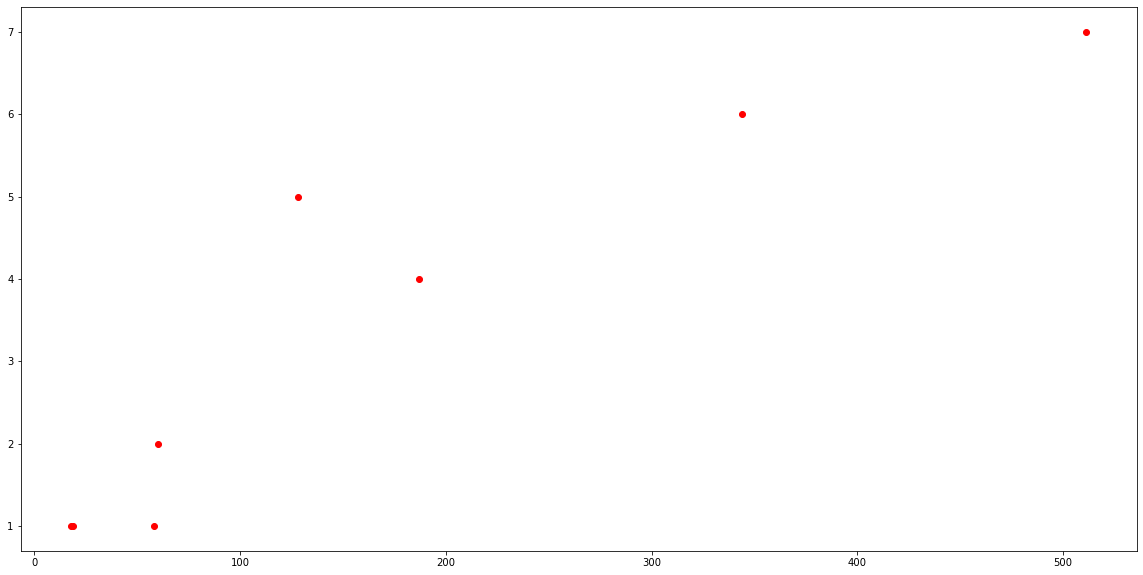

In [51]:
datos_x = [18, 19, 58, 60 ,128, 187, 344, 511]
datos_y = [1, 1, 1, 2, 5, 4, 6, 7]
plt.figure(figsize=(20,10))
plt.plot(datos_x, datos_y, 'ro')


coeficiente de determinación: 0.8379440734181218


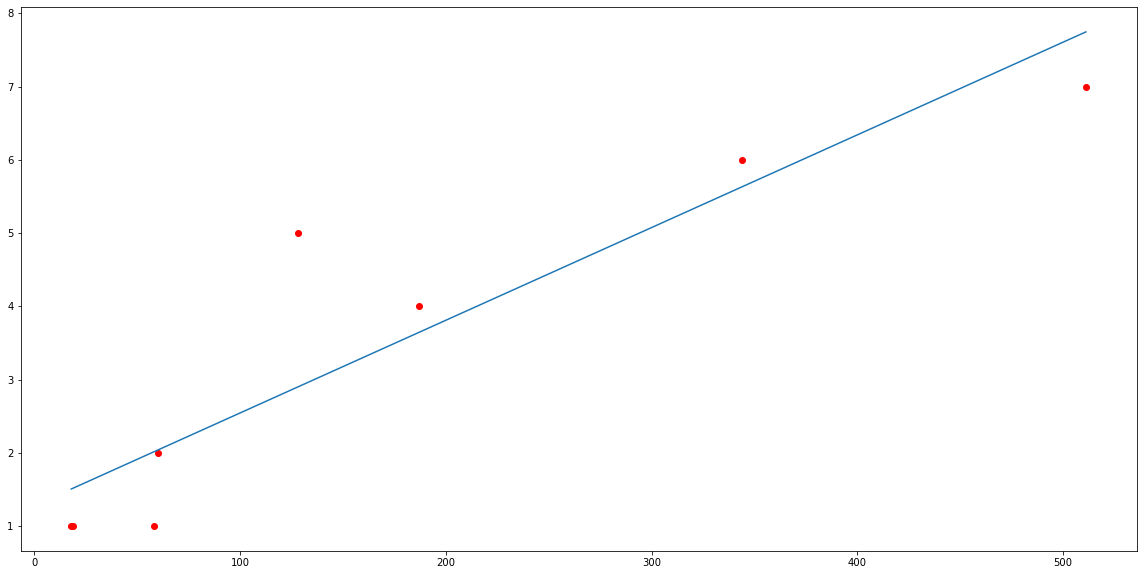

In [52]:
# Regresión lineal
a_1, a_0 = mincua_lineal(datos_x, datos_y)
f = lambda x: a_1*x + a_0
x = np.linspace(min(datos_x),max(datos_x))
plt.figure(figsize=(20,10))
plt.plot(datos_x, datos_y, 'ro')
plt.plot(x, f(x), '-')
print(f'coeficiente de determinación: {coef_det(datos_x, datos_y, f)}')

In [53]:
# Regresión exponencial
# transformación semilogaritmica
datos_Y = np.log(datos_y)
a_1, a_0 = mincua_lineal(datos_x, datos_Y)
print(f'Regresión: {a_1}*x + {a_0}')

Regresión: 0.004052572026300635*x + 0.2571113921936199


coeficiente de determinación: 0.4841652358377329


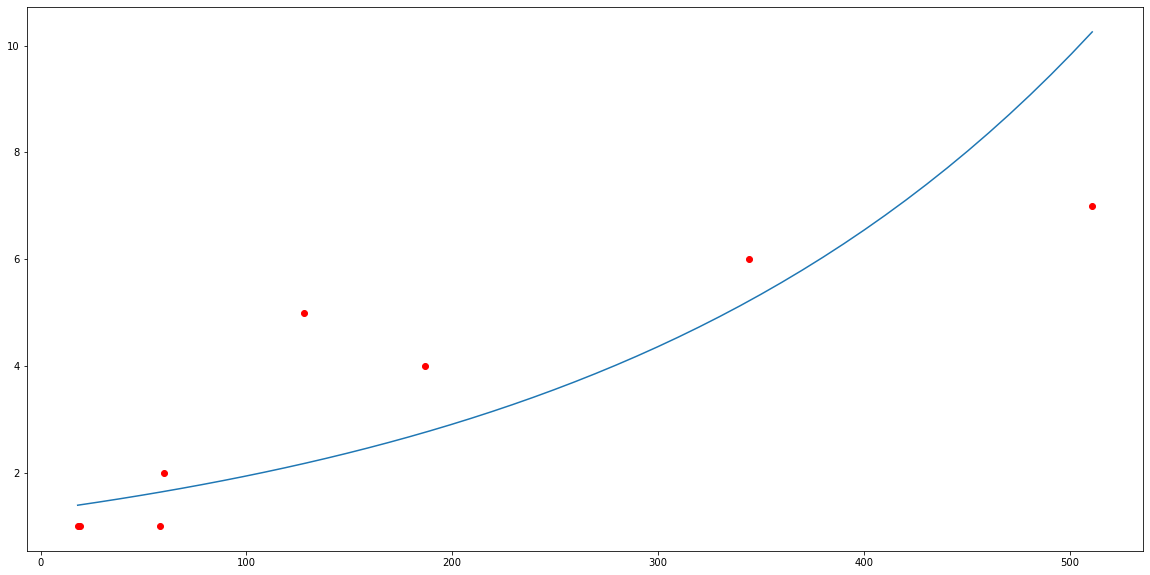

In [54]:
f = lambda x: (np.exp(a_0))* np.exp(a_1*x)
x = np.linspace(min(datos_x),max(datos_x))
plt.figure(figsize=(20,10))
plt.plot(datos_x, datos_y, 'ro')
plt.plot(x, f(x), '-')
print(f'coeficiente de determinación: {coef_det(datos_x, datos_y, f)}')

In [55]:
# Regresión potencia
# transformación logaritmica
datos_X = np.log(datos_x)
datos_Y = np.log(datos_y)
a_1, a_0 = mincua_lineal(datos_X, datos_Y)
print(f'Regresión: {a_1}*x + {a_0}')

Regresión: 0.6405123462557096*x + -1.9659763895370723


coeficiente de determinación: 0.8884805727968488


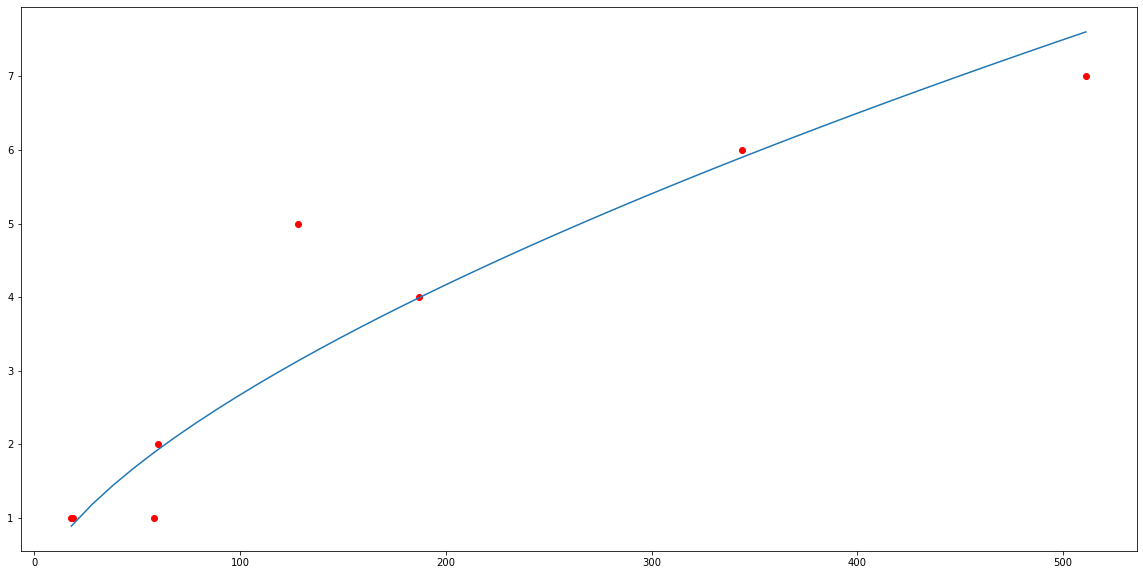

In [57]:
f = lambda x: (np.exp(a_0))* x**(a_1)
x = np.linspace(min(datos_x),max(datos_x))
plt.figure(figsize=(20,10))
plt.plot(datos_x, datos_y, 'ro')
plt.plot(x, f(x), '-')
print(f'coeficiente de determinación: {coef_det(datos_x, datos_y, f)}')